# Playing Frame Stream From Video

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"    

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S01\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s01\env

d:\html_doc\program\opencv\packt\s01\env\lib\site-packages
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


## Reading the images from files

In [2]:
import cv2

# Next, we'll use VideoCapture function and Instead of passing the device index
# We'll pass the path to our video file as an argument
# Since it's in the current directory, we'll just pass name

capture = cv2.VideoCapture('../data/drop.avi')
# Let's verify if the video source is open
capture.isOpened()

True

Created capture: ../data/drop.avi
Frame count: 182
Frame width: 256
Frame height: 240
Frame rate: 30.0
count == 30
count == 60
count == 90
count == 120
count == 150
count == 180
Reached end of video
frame[30] shape ==(240, 256, 3) 
  Shape: (240, 256, 3)   Data type: uint8
[ [163 161 163] [202 200 202] [219 217 219] [229 227 229] [228 226 228] [227 225 227] [226 224 226] ]
[ [155 153 155] [198 196 198] [220 218 220] [226 224 226] [226 224 226] [226 224 226] [226 224 226] ]
[ [150 147 149] [197 194 196] [221 218 220] [225 222 224] [226 223 225] [226 223 225] [226 223 225] ]
[ [157 154 156] [196 193 195] [214 211 213] [223 220 222] [223 220 222] [223 220 222] [223 220 222] ]
[ [169 167 169] [202 200 202] [216 214 216] [222 220 222] [222 220 222] [222 220 222] [222 220 222] ]
[ [185 183 185] [210 208 210] [218 216 218] [222 220 222] [222 220 222] [222 220 222] [222 220 222] ]  frame: uint8
frame[60] shape ==(240, 256, 3) 
  Shape: (240, 256, 3)   Data type: uint8
[ [220 218 220] [220 218 

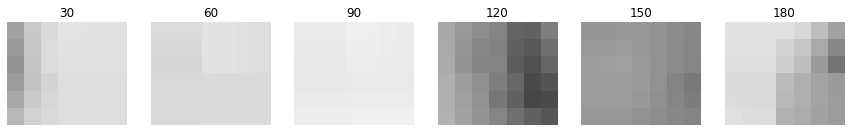

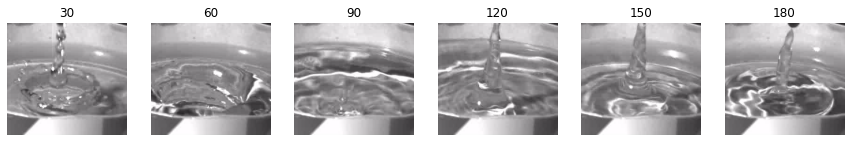

key -1


In [3]:
print('Created capture:', '../data/drop.avi')
print('Frame count:', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
print('Frame width:', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height:', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Frame rate:', capture.get(cv2.CAP_PROP_FPS))

count = 0
image_frames =[]

while True:
    has_frame, frame = capture.read()
    count +=1
    if not has_frame:
        print('Reached end of video')
        break
    #print("count",count,count % 100)
    if count % 30 == 0:
        print("count ==",count)
        image_frames.append([str(count),frame])
    cv2.imshow('frame', frame)
    key = cv2.waitKey(500)
    if key == 27:
        print('Pressed Esc')
        break

for item in image_frames:    
    print_image('frame[{0}] shape =={1} '.format(item[0], item[1].shape),'frame', 
                item[1],29,35,125,132)
plt_view_image(plt,[[i[0],i[1][29:35,125:132]] for i in image_frames])        
plt_view_image(plt,[[i[0],i[1]] for i in image_frames])        
cv2.destroyAllWindows()
print("key",key)